In [15]:
from __future__ import division
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
data_type = 'genie'
nu_type ="NuTau"
int_type = 1
folder = '1' 
files = '1'

n_files = 10
i3_per_npz = 10 # 10 for NuE1 and NuMu1, 100 otherwise

name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)+'1_'
#name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)
#name = nu_type+'_'+str(int_type)
name2 = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)

print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

NuTau_1_1_11_


In [28]:
data_1 = []
for file in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_1.append(i)
data_1 = np.array(data_1)
print(data_1.shape)

/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)
(12960, 1)


In [29]:
data_2 = []
for file in glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_1?_*'):
    x = np.load(file, mmap_mode="r")['arr_0']
    print(file, x.shape)
    for i in x:
        data_2.append(i)
data_2 = np.array(data_2)
print(data_2.shape)

/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_10_data.npz (1230, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_11_data.npz (1251, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_19_data.npz (1378, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_14_data.npz (1309, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_12_data.npz (1249, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_16_data.npz (1326, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_18_data.npz (1307, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_17_data.npz (1305, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_15_data.npz (1311, 1)
/home/dup193/work/double_pulse/data/new_vars/Images_NuTau_1_1_13_data.npz (1294, 1)
(12960, 1)


In [17]:
def ims(e):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')

In [46]:
dif = []
same = []
for e in data_1:
    e2 = data_2[(data_2['id']['event_id'] == e['id']['event_id']) & (data_2['id']['run_id'] == e['id']['run_id'])]
    if e['image'].max() == e2['image'].max():
        dif.append(e['id']['run_id'])
    else:
        same.append(e['id']['run_id'])

In [ ]:
print

In [49]:
print(len(dif),len(same))
print(np.unique(same))
print(np.unique(dif))

7993 4967
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]


0.499132 -0.0035557065
0.33085898 -0.00087834423


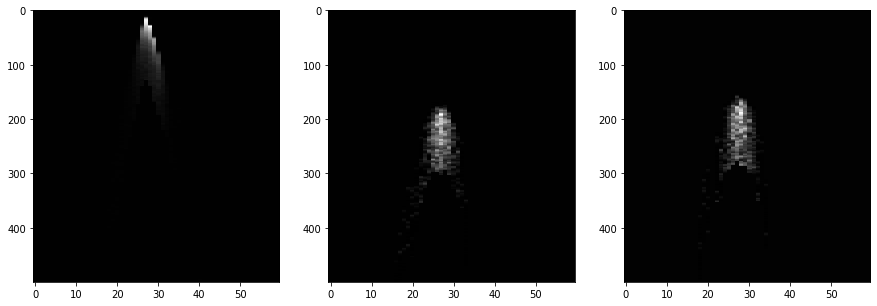

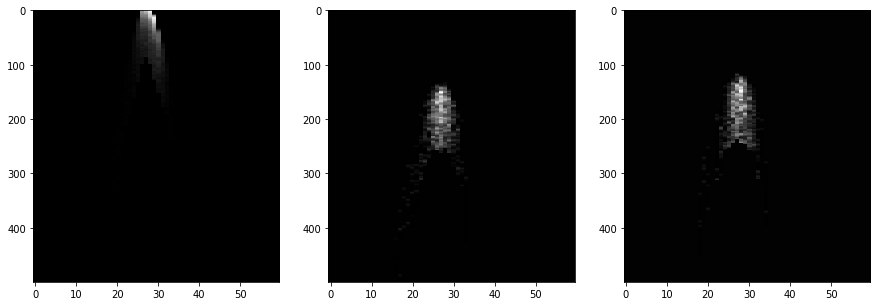

In [37]:
e1 = data_1[(data_1['id']['event_id']==716) & (data_1['id']['run_id']==167)]
e2 = data_2[(data_2['id']['event_id']==716) & (data_2['id']['run_id']==167)]
ims(e1)
ims(e2)
print(e1['image'].max(),e1['image'].min())
print(e2['image'].max(),e2['image'].min())

In [21]:
import tensorflow as tf
import os
physical_devices = tf.config.list_physical_devices()
print(physical_devices) 

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_3/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')

#model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_600k_Qst_2000_3class_classweight/vgg16_600k_QSt2000_dataset_norm_3class_classweight5.h5')

mean = 0.0012322452384978533 
std = 0.009694634936749935
mean_4 = 0.00036459346301853657
std_4 = 0.007035365793853998



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU')]


In [24]:
im = (e1['image']-mean)/std
print(im.max())
pred1_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
im = (e1['image']-mean_4)/std_4
print(im.max())
pred1_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
print(pred1_n1,pred1_n4)

im = (e2['image']-mean)/std
print(im.max())
pred2_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
im = (e2['image']-mean_4)/std_4
print(im.max())
pred2_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
print(pred2_n1,pred2_n4)


41.872192
57.822617
[[0.40042716]] [[0.7818388]]
31.149218
43.046505
[[0.3968984]] [[0.21932675]]


In [10]:
import time
pos = 0
print(name)
start = time.time()
for file_name in glob.glob('/home/dup193/work/double_pulse/data/new_vars/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    e = x[(x['id']['event_id']==680) & (x['id']['run_id']==117)]
    im = (e['image']-mean)/std
    print(im.max())
    pred_n1 = model.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
    im = (e['image']-mean_4)/std_4
    print(im.max())
    pred_n4 = model_4.predict([im[:,:,:,:1],im[:,:,:,1:2],im[:,:,:,2:3]],batch_size=1)
    print(pred_n1,pred_n4)
   # for n,e in enumerate(x):
   #     if x['d']
   #     preds = np.zeros(1,dtype = preds_dtype)    
   #     preds[['n1','n4']] = (pred_n1[n],pred_n4[n],pred_n5[n],\
   #                                                                          pred_n6[n],pred_n7[n],pred_n8[n],pred_n9[n],pred_n10[n],pred_n11[n])
   #     weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
   #                              n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
   #     y[["id","dom","im_sum","out_st","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
   #        "logan_veto","hese_old","hese","weight"]][n]=(e['id'],max_dom,im_sum, [top_st,top3_st,top10_st],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
   #                                                      e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
   #                                                      e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    #data[pos:pos+len(x)] = y
    #pos = pos + len(x)

end = time.time()
print(end - start)

NuTau_1_1_11_
53.265484
73.522415
[[0.9996611]] [[0.945356]]
23.595426559448242
